In [3]:
%reset
import numpy as np
import pandas as pd
import pickle
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import  plot_series
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [1]:
from sktime.registry import all_estimators
import pandas as pd
# all_estimators returns list of pairs - data frame conversion for pretty printing
all_estimators("forecaster", as_dataframe=True)

C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\registry\_lookup.py:158: ImportWarning: No module named 'dtw'. 'dtw' is a soft dependency and not included in the sktime installation. Please run: `pip install dtw`. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(str(e), ImportWarning)


KeyboardInterrupt: 

In [13]:
#Ouvre le fichier CSV du capteur dont les données sont issues
df = pd.read_csv("k_ambience_motion_5893.csv", sep=',', header=0, names=["value_id", "sensor_id", "timestamp", "value"])

#Transtypage des colonnes
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['value'] = df['value'].astype('int64')

#Selection de la plage de dates à extraire du dataset
df = df[(df['timestamp'] > '2020-03-09') & (df['timestamp'] <= '2020-03-20')]
df = df.set_index('timestamp').asfreq('5min')
df.fillna(method='ffill', inplace=True)

#Suppression des colonnes inutiles pour l'apprentissage
df = df.drop(columns=["sensor_id","value_id"])
df

FileNotFoundError: [Errno 2] No such file or directory: 'human_activity_raw_sensor_data_float6632.csv'

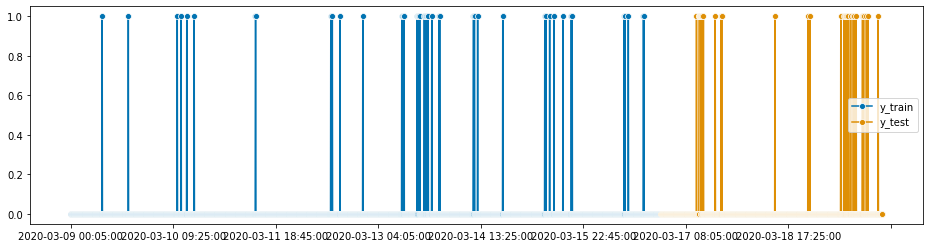

In [5]:
# Slipt test/train des données
y_train, y_test = temporal_train_test_split(df, test_size=3*12*24)
plot_series(y_train, y_test, labels=["y_train", "y_test",]);

                     value
2020-03-09 00:05:00    0.0
2020-03-09 00:10:00    0.0
2020-03-09 00:15:00    0.0
2020-03-09 00:20:00    0.0
2020-03-09 00:25:00    0.0
...                    ...
2020-03-16 23:40:00    0.0
2020-03-16 23:45:00    0.0
2020-03-16 23:50:00    0.0
2020-03-16 23:55:00    0.0
2020-03-17 00:00:00    0.0

[2304 rows x 1 columns]
                     value
2020-03-17 00:05:00    0.0
2020-03-17 00:10:00    0.0
2020-03-17 00:15:00    0.0
2020-03-17 00:20:00    0.0
2020-03-17 00:25:00    0.0
2020-03-17 00:30:00    0.0
2020-03-17 00:35:00    0.0
2020-03-17 00:40:00    0.0
2020-03-17 00:45:00    0.0
2020-03-17 00:50:00    0.0
46912496118442.7


C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:533: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:543: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.o

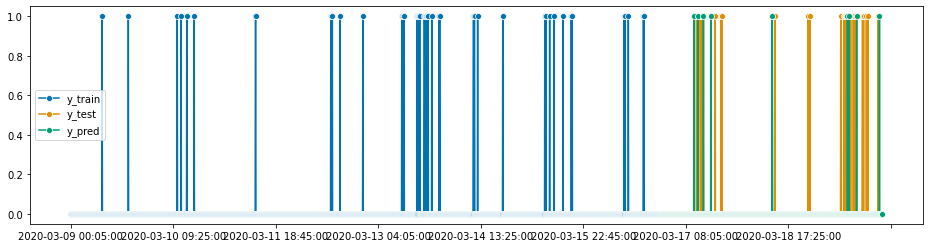

In [6]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=24*12*7)
print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [5]:
#Sauvegarde du modèle avec Pickle
filename = 'model_5896_bed_pressure.pkl'
pickle.dump(forecaster, open(filename, 'wb'))

                     value
2020-03-09 00:05:00    0.0
2020-03-09 00:10:00    0.0
2020-03-09 00:15:00    0.0
2020-03-09 00:20:00    0.0
2020-03-09 00:25:00    0.0
...                    ...
2020-03-16 23:40:00    0.0
2020-03-16 23:45:00    0.0
2020-03-16 23:50:00    0.0
2020-03-16 23:55:00    0.0
2020-03-17 00:00:00    0.0

[2304 rows x 1 columns]
                        value
2020-03-17 00:05:00  0.000002
2020-03-17 00:10:00  0.000002
2020-03-17 00:15:00  0.000002
2020-03-17 00:20:00  0.000002
2020-03-17 00:25:00  0.000002
2020-03-17 00:30:00  0.000002
2020-03-17 00:35:00  0.000002
2020-03-17 00:40:00  0.000002
2020-03-17 00:45:00  0.000002
2020-03-17 00:50:00  0.000002
9072996459.320267


C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


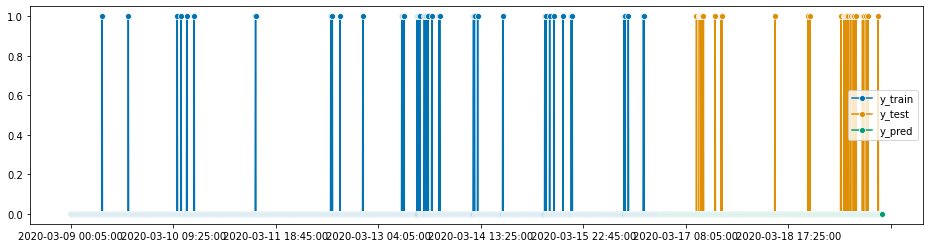

In [11]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(sp=24*7*12)

fh = ForecastingHorizon(y_test.index, is_relative=False)

print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import EnsembleForecaster
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.arima import AutoARIMA

ensemble = EnsembleForecaster(forecasters = [("tbats", TBATS()),
                                             ("autoarima", AutoARIMA())],                         
                              aggfunc = "min")
ensemble.fit(y_train)
print(ensemble.forecasters_)

                     value
2020-03-09 00:05:00    0.0
2020-03-09 00:10:00    0.0
2020-03-09 00:15:00    0.0
2020-03-09 00:20:00    0.0
2020-03-09 00:25:00    0.0
...                    ...
2020-03-16 23:40:00    0.0
2020-03-16 23:45:00    0.0
2020-03-16 23:50:00    0.0
2020-03-16 23:55:00    0.0
2020-03-17 00:00:00    0.0

[2304 rows x 1 columns]
                        value
2020-03-17 00:05:00  0.000002
2020-03-17 00:10:00  0.000002
2020-03-17 00:15:00  0.000002
2020-03-17 00:20:00  0.000002
2020-03-17 00:25:00  0.000002
2020-03-17 00:30:00  0.000002
2020-03-17 00:35:00  0.000002
2020-03-17 00:40:00  0.000002
2020-03-17 00:45:00  0.000002
2020-03-17 00:50:00  0.000002
9079256894.405231


C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
C:\Users\patrick.olislaegers\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\utils\datetime.py:83: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


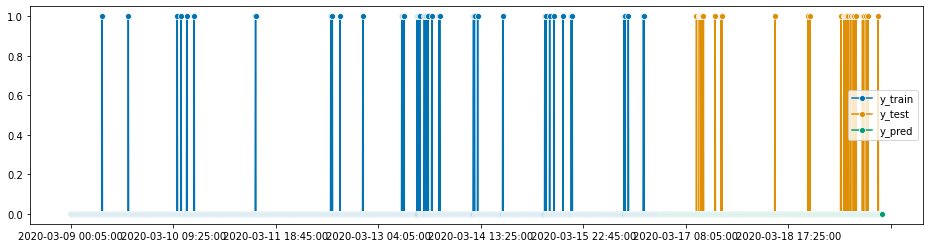

In [15]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(sp=24*12*7)

fh = ForecastingHorizon(y_test.index, is_relative=False)

print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [16]:
from sktime.forecasting.bats import BATS
forecaster = BATS(sp=24*12*7, use_trend=True, use_box_cox=False)

fh = ForecastingHorizon(y_test.index, is_relative=False)

print(y_train)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
print(y_pred[:10])
#y_pred.fillna(method='ffill', inplace=True)
#y_pred["value"] = y_pred.astype('int64')

# step 3: specifying the evaluation metric
mape = MeanAbsolutePercentageError(symmetric=False)

# step 4: computing the forecast performance
print(mape(y_test, y_pred))
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

                     value
2020-03-09 00:05:00    0.0
2020-03-09 00:10:00    0.0
2020-03-09 00:15:00    0.0
2020-03-09 00:20:00    0.0
2020-03-09 00:25:00    0.0
...                    ...
2020-03-16 23:40:00    0.0
2020-03-16 23:45:00    0.0
2020-03-16 23:50:00    0.0
2020-03-16 23:55:00    0.0
2020-03-17 00:00:00    0.0

[2304 rows x 1 columns]
